# 🌪️ BÀI 3: PHÂN LOẠI MỨC ĐỘ THẢM HỌA (CLASSIFICATION)

## **Dự đoán mức độ thảm họa: Nhỏ - Lớn - Siêu Thảm Họa**

---

### 📋 **Mô tả bài toán**

**Bài toán phân loại (Classification)** là một trong những bài toán cơ bản và quan trọng nhất trong Machine Learning. Mục tiêu của bài toán này là dự đoán **nhãn/lớp (label/class)** của một mẫu dữ liệu dựa trên các đặc trưng (features) đầu vào.

**Trong bài này, chúng ta sẽ:**
- Xây dựng mô hình phân loại để dự đoán **mức độ thảm họa** dựa trên các yếu tố như quốc gia, loại thảm họa, thiệt hại, thời gian phản ứng, v.v.
- So sánh hiệu suất của nhiều thuật toán phân loại khác nhau
- Đánh giá mô hình bằng các chỉ số: Accuracy, Precision, Recall, F1-Score

---

### 📊 **Đặc tả Input/Output**

| **Input (Đặc trưng đầu vào)** | **Mô tả** |
|-------------------------------|-----------|
| Quốc gia (country) | Tên quốc gia xảy ra thảm họa |
| Thảm họa (disaster_type) | Loại thảm họa (Earthquake, Flood, Hurricane...) |
| Mức độ nghiêm trọng (severity_index) | Chỉ số đánh giá mức độ nghiêm trọng (0-10) |
| Thời gian phản ứng (response_time_hours) | Thời gian phản ứng tính bằng giờ |
| Hiệu quả phản ứng (response_efficiency_score) | Điểm hiệu quả phản ứng (0-100) |
| Kinh độ (longitude) | Tọa độ kinh độ |
| Vĩ độ (latitude) | Tọa độ vĩ độ |
| Thiệt hại về người (casualties) | Số người thương vong |
| Thiệt hại kinh tế (economic_loss_usd) | Thiệt hại kinh tế (USD) |
| Viện trợ quốc tế (aid_amount_usd) | Số tiền viện trợ quốc tế (USD) |
| Số ngày hồi phục (recovery_days) | Số ngày cần để hồi phục |

| **Output (Nhãn đầu ra)** | **Mô tả** |
|--------------------------|-----------|
| Mức độ thảm họa | **Nhỏ (0)** - **Lớn (1)** - **Siêu Thảm Họa (2)** |

---

### 🎯 **Thuật toán sử dụng**
1. **Random Forest Classifier** - Thuật toán rừng ngẫu nhiên
2. **Logistic Regression** - Hồi quy Logistic đa lớp
3. **Support Vector Machine (SVM)** - Máy vector hỗ trợ
4. **K-Nearest Neighbors (KNN)** - K láng giềng gần nhất
5. **Decision Tree** - Cây quyết định
6. **Gradient Boosting** - Tăng cường gradient

## 📦 PHẦN 1: IMPORT THƯ VIỆN VÀ LOAD DỮ LIỆU

### 1.1 Import các thư viện cần thiết

**Giải thích:**
- **pandas**: Thư viện xử lý dữ liệu dạng bảng (DataFrame)
- **numpy**: Thư viện tính toán số học và mảng
- **matplotlib & seaborn**: Thư viện trực quan hóa dữ liệu
- **sklearn**: Thư viện Machine Learning phổ biến nhất của Python
- **warnings**: Để tắt các cảnh báo không cần thiết

In [4]:
# ============================================================
# IMPORT CÁC THƯ VIỆN CẦN THIẾT
# ============================================================

# Thư viện xử lý dữ liệu
import pandas as pd
import numpy as np

# Thư viện trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện Machine Learning - Tiền xử lý
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Thư viện Machine Learning - Các thuật toán phân loại
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Thư viện đánh giá mô hình
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report, 
    confusion_matrix,
    roc_curve, 
    auc,
    roc_auc_score
)

# Tắt cảnh báo
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
pd.set_option('display.max_columns', None)

print("✅ Đã import thành công tất cả thư viện cần thiết!")

✅ Đã import thành công tất cả thư viện cần thiết!


### 1.2 Đọc dữ liệu từ file CSV

**Giải thích:**
- Sử dụng `pd.read_csv()` để đọc file CSV chứa dữ liệu thảm họa toàn cầu
- File dữ liệu chứa thông tin về các thảm họa từ năm 2018-2024
- Hiển thị 5 dòng đầu tiên để kiểm tra cấu trúc dữ liệu

In [ ]:
# ============================================================
# ĐỌC DỮ LIỆU TỪ FILE CSV
# ============================================================

# Đường dẫn file dữ liệu (file nằm cùng thư mục với notebook)
file_path = 'global_disaster_response_2018_2024.csv'

# Đọc dữ liệu
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
print("=" * 60)
print("📊 THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU")
print("=" * 60)
print(f"\n📌 Số lượng bản ghi: {df.shape[0]:,}")
print(f"📌 Số lượng đặc trưng: {df.shape[1]}")
print(f"\n📌 Danh sách các cột:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print("\n" + "=" * 60)
print("📋 5 DÒNG DỮ LIỆU ĐẦU TIÊN")
print("=" * 60)
df.head()

❌ Không tìm thấy file CSV!
Thư mục hiện tại: c:\Users\MINH HIEU\Documents\GitHub\Du-Doan-Tham-Hoa-Toan-Cau\Hiếu
Đang tìm trong các đường dẫn:
   • ../global_disaster_response_2018_2024.csv
   • c:/Users/MINH HIEU/Documents/GitHub/Du-Doan-Tham-Hoa-Toan-Cau/global_disaster_response_2018_2024.csv
   • c:\Users\MINH HIEU\Documents\GitHub\Du-Doan-Tham-Hoa-Toan-Cau\global_disaster_response_2018_2024.csv


## 📊 PHẦN 2: KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU (EDA & PREPROCESSING)

### 2.1 Kiểm tra thông tin dữ liệu

**Giải thích:**
- Kiểm tra kiểu dữ liệu của từng cột
- Xác định các giá trị bị thiếu (missing values)
- Phân tích thống kê mô tả cơ bản

In [10]:
# ============================================================
# KIỂM TRA THÔNG TIN DỮ LIỆU
# ============================================================

print("=" * 60)
print("📊 THÔNG TIN CHI TIẾT VỀ DỮ LIỆU")
print("=" * 60)
print("\n📌 Kiểu dữ liệu của từng cột:")
print(df.dtypes)

print("\n" + "=" * 60)
print("📊 KIỂM TRA GIÁ TRỊ BỊ THIẾU (MISSING VALUES)")
print("=" * 60)
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Số lượng thiếu': missing,
    'Tỷ lệ (%)': missing_percent
})
print(missing_df)

print("\n" + "=" * 60)
print("📊 THỐNG KÊ MÔ TẢ CÁC CỘT SỐ")
print("=" * 60)
df.describe()

📊 THÔNG TIN CHI TIẾT VỀ DỮ LIỆU

📌 Kiểu dữ liệu của từng cột:


NameError: name 'df' is not defined

### 2.2 Tạo biến mục tiêu (Target Variable) - Mức độ thảm họa

**Giải thích về cách phân loại:**

Chúng ta sẽ tạo biến mục tiêu `disaster_level` (Mức độ thảm họa) dựa trên tổng hợp nhiều yếu tố:
- **Chỉ số nghiêm trọng (severity_index)**: Đo lường mức độ nghiêm trọng ban đầu
- **Thiệt hại về người (casualties)**: Số người thương vong
- **Thiệt hại kinh tế (economic_loss_usd)**: Mức thiệt hại về tài chính

**Quy tắc phân loại:**
- **Mức 0 (Thảm họa nhỏ)**: Severity < 3.5 VÀ casualties < 50 VÀ economic_loss < 2,000,000 USD
- **Mức 1 (Thảm họa lớn)**: Severity 3.5-7 HOẶC casualties 50-150 HOẶC economic_loss 2,000,000-6,000,000 USD  
- **Mức 2 (Siêu thảm họa)**: Severity > 7 HOẶC casualties > 150 HOẶC economic_loss > 6,000,000 USD

In [ ]:
# ============================================================
# TẠO BIẾN MỤC TIÊU - MỨC ĐỘ THẢM HỌA
# ============================================================

def classify_disaster_level(row):
    """
    Hàm phân loại mức độ thảm họa dựa trên nhiều tiêu chí
    
    Returns:
        0: Thảm họa nhỏ
        1: Thảm họa lớn
        2: Siêu thảm họa
    """
    severity = row['severity_index']
    casualties = row['casualties']
    economic_loss = row['economic_loss_usd']
    
    # Tính điểm tổng hợp
    score = 0
    
    # Đánh giá theo severity_index
    if severity >= 7:
        score += 3
    elif severity >= 3.5:
        score += 2
    else:
        score += 1
    
    # Đánh giá theo casualties
    if casualties >= 150:
        score += 3
    elif casualties >= 50:
        score += 2
    else:
        score += 1
    
    # Đánh giá theo economic_loss
    if economic_loss >= 6000000:
        score += 3
    elif economic_loss >= 2000000:
        score += 2
    else:
        score += 1
    
    # Phân loại cuối cùng dựa trên tổng điểm
    if score >= 7:
        return 2  # Siêu thảm họa
    elif score >= 5:
        return 1  # Thảm họa lớn
    else:
        return 0  # Thảm họa nhỏ

# Áp dụng hàm phân loại
df['disaster_level'] = df.apply(classify_disaster_level, axis=1)

# Tạo nhãn cho các mức độ
disaster_labels = {0: 'Nhỏ', 1: 'Lớn', 2: 'Siêu Thảm Họa'}
df['disaster_level_name'] = df['disaster_level'].map(disaster_labels)

print("=" * 60)
print("📊 PHÂN BỐ MỨC ĐỘ THẢM HỌA")
print("=" * 60)
level_counts = df['disaster_level_name'].value_counts()
print("\n📌 Số lượng theo từng mức độ:")
for level, count in level_counts.items():
    percentage = count / len(df) * 100
    print(f"   • {level}: {count:,} ({percentage:.2f}%)")

print("\n📌 Tổng số bản ghi:", len(df))

📊 PHÂN BỐ MỨC ĐỘ THẢM HỌA

📌 Số lượng theo từng mức độ:
   • Lớn: 21,931 (43.86%)
   • Siêu Thảm Họa: 19,696 (39.39%)
   • Nhỏ: 8,373 (16.75%)

📌 Tổng số bản ghi: 50000


### 2.3 Trực quan hóa phân bố mức độ thảm họa

**Giải thích:**
- Biểu đồ cột (Bar Chart) thể hiện số lượng thảm họa theo từng mức độ
- Biểu đồ tròn (Pie Chart) thể hiện tỷ lệ phần trăm của mỗi mức độ
- Giúp ta hiểu được sự cân bằng/mất cân bằng của dữ liệu (data imbalance)

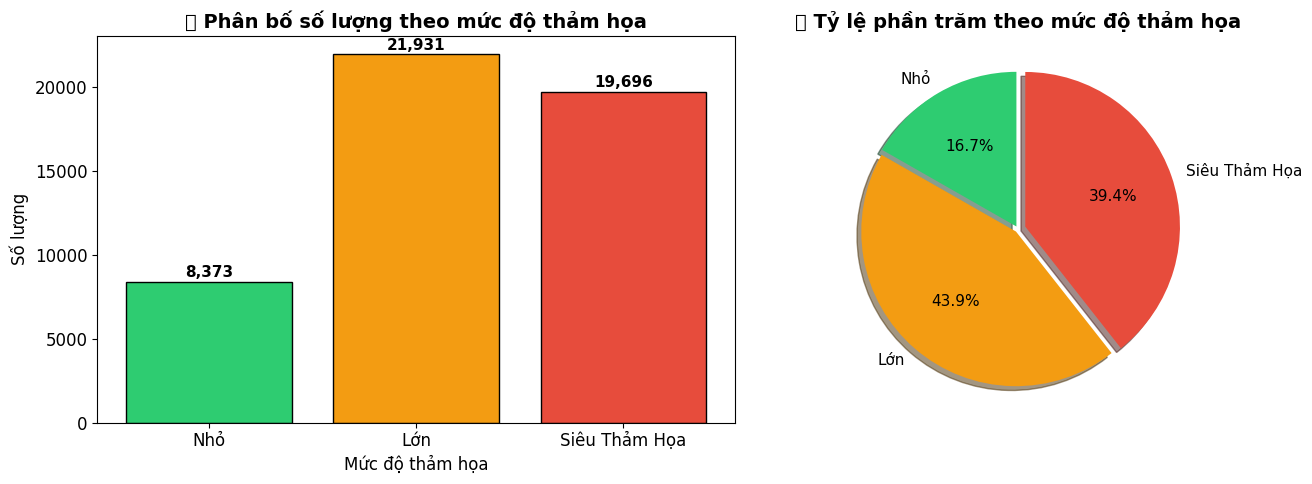


✅ Đã lưu biểu đồ vào: figures/phan_bo_muc_do_tham_hoa.png


In [ ]:
# ============================================================
# TRỰC QUAN HÓA PHÂN BỐ MỨC ĐỘ THẢM HỌA
# ============================================================
import os
os.makedirs('../figures', exist_ok=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Màu sắc cho từng mức độ
colors = ['#2ecc71', '#f39c12', '#e74c3c']  # Xanh, Vàng, Đỏ

# Biểu đồ cột
level_order = ['Nhỏ', 'Lớn', 'Siêu Thảm Họa']
level_counts_sorted = df['disaster_level_name'].value_counts().reindex(level_order)

bars = axes[0].bar(level_counts_sorted.index, level_counts_sorted.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Mức độ thảm họa', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].set_title('📊 Phân bố số lượng theo mức độ thảm họa', fontsize=14, fontweight='bold')

# Thêm số liệu lên cột
for bar, count in zip(bars, level_counts_sorted.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
                 f'{count:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Biểu đồ tròn
axes[1].pie(level_counts_sorted.values, labels=level_counts_sorted.index, colors=colors,
            autopct='%1.1f%%', startangle=90, explode=(0.02, 0.02, 0.05),
            textprops={'fontsize': 11}, shadow=True)
axes[1].set_title('📊 Tỷ lệ phần trăm theo mức độ thảm họa', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/phan_bo_muc_do_tham_hoa.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Đã lưu biểu đồ vào: ../figures/phan_bo_muc_do_tham_hoa.png")

### 2.4 Mã hóa biến phân loại (Encoding Categorical Variables)

**Giải thích:**

Các thuật toán Machine Learning chỉ làm việc được với dữ liệu số, do đó cần chuyển đổi các biến phân loại (categorical) sang dạng số:

- **Label Encoding**: Chuyển các giá trị text thành số nguyên (0, 1, 2, ...)
  - Ví dụ: `country`: Vietnam → 0, Japan → 1, USA → 2, ...
  - Ví dụ: `disaster_type`: Earthquake → 0, Flood → 1, Hurricane → 2, ...

**Ưu điểm của Label Encoding:**
- Đơn giản, dễ implement
- Không tăng số chiều dữ liệu
- Phù hợp với các thuật toán dựa trên cây (Tree-based algorithms)

In [ ]:
# ============================================================
# MÃ HÓA BIẾN PHÂN LOẠI (LABEL ENCODING)
# ============================================================

# Tạo bản sao để xử lý
df_processed = df.copy()

# Khởi tạo Label Encoders cho từng biến phân loại
le_country = LabelEncoder()
le_disaster = LabelEncoder()

# Mã hóa biến 'country'
df_processed['country_encoded'] = le_country.fit_transform(df_processed['country'])

# Mã hóa biến 'disaster_type'
df_processed['disaster_type_encoded'] = le_disaster.fit_transform(df_processed['disaster_type'])

print("=" * 60)
print("📊 KẾT QUẢ MÃ HÓA BIẾN PHÂN LOẠI")
print("=" * 60)

print("\n📌 Mã hóa Quốc gia (country):")
country_mapping = dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))
for country, code in list(country_mapping.items())[:10]:
    print(f"   • {country}: {code}")
print(f"   ... (Tổng cộng {len(country_mapping)} quốc gia)")

print("\n📌 Mã hóa Loại thảm họa (disaster_type):")
disaster_mapping = dict(zip(le_disaster.classes_, le_disaster.transform(le_disaster.classes_)))
for disaster, code in disaster_mapping.items():
    print(f"   • {disaster}: {code}")

print("\n✅ Hoàn thành mã hóa biến phân loại!")

📊 KẾT QUẢ MÃ HÓA BIẾN PHÂN LOẠI

📌 Mã hóa Quốc gia (country):
   • Australia: 0
   • Bangladesh: 1
   • Brazil: 2
   • Canada: 3
   • Chile: 4
   • China: 5
   • France: 6
   • Germany: 7
   • Greece: 8
   • India: 9
   ... (Tổng cộng 20 quốc gia)

📌 Mã hóa Loại thảm họa (disaster_type):
   • Drought: 0
   • Earthquake: 1
   • Extreme Heat: 2
   • Flood: 3
   • Hurricane: 4
   • Landslide: 5
   • Storm Surge: 6
   • Tornado: 7
   • Volcanic Eruption: 8
   • Wildfire: 9

✅ Hoàn thành mã hóa biến phân loại!


### 2.5 Chuẩn bị đặc trưng (Features) và Nhãn (Target)

**Giải thích:**
- **X (Features)**: Tập hợp các đặc trưng đầu vào để mô hình học
- **y (Target)**: Biến mục tiêu cần dự đoán (mức độ thảm họa)

**Các đặc trưng được sử dụng:**
1. `country_encoded`: Mã quốc gia (đã mã hóa)
2. `disaster_type_encoded`: Mã loại thảm họa (đã mã hóa)
3. `severity_index`: Chỉ số nghiêm trọng
4. `response_time_hours`: Thời gian phản ứng (giờ)
5. `response_efficiency_score`: Điểm hiệu quả phản ứng
6. `latitude`: Vĩ độ
7. `longitude`: Kinh độ
8. `casualties`: Số người thương vong
9. `economic_loss_usd`: Thiệt hại kinh tế
10. `aid_amount_usd`: Số tiền viện trợ
11. `recovery_days`: Số ngày hồi phục

In [ ]:
# ============================================================
# CHUẨN BỊ ĐẶC TRƯNG (FEATURES) VÀ NHÃN (TARGET)
# ============================================================

# Danh sách các đặc trưng sử dụng
feature_columns = [
    'country_encoded',        # Mã quốc gia
    'disaster_type_encoded',  # Mã loại thảm họa
    'severity_index',         # Chỉ số nghiêm trọng
    'response_time_hours',    # Thời gian phản ứng
    'response_efficiency_score',  # Hiệu quả phản ứng
    'latitude',               # Vĩ độ
    'longitude',              # Kinh độ
    'casualties',             # Thiệt hại về người
    'economic_loss_usd',      # Thiệt hại kinh tế
    'aid_amount_usd',         # Viện trợ quốc tế
    'recovery_days'           # Số ngày hồi phục
]

# Tạo ma trận đặc trưng X
X = df_processed[feature_columns]

# Tạo vector nhãn y
y = df_processed['disaster_level']

print("=" * 60)
print("📊 THÔNG TIN VỀ ĐẶC TRƯNG VÀ NHÃN")
print("=" * 60)
print(f"\n📌 Kích thước ma trận đặc trưng X: {X.shape}")
print(f"   • Số lượng mẫu: {X.shape[0]:,}")
print(f"   • Số lượng đặc trưng: {X.shape[1]}")

print(f"\n📌 Kích thước vector nhãn y: {y.shape}")
print(f"\n📌 Phân bố nhãn:")
for level in sorted(y.unique()):
    count = (y == level).sum()
    print(f"   • Mức {level} ({disaster_labels[level]}): {count:,} ({count/len(y)*100:.2f}%)")

print("\n📌 5 mẫu đầu tiên của X:")
X.head()

📊 THÔNG TIN VỀ ĐẶC TRƯNG VÀ NHÃN

📌 Kích thước ma trận đặc trưng X: (50000, 11)
   • Số lượng mẫu: 50,000
   • Số lượng đặc trưng: 11

📌 Kích thước vector nhãn y: (50000,)

📌 Phân bố nhãn:
   • Mức 0 (Nhỏ): 8,373 (16.75%)
   • Mức 1 (Lớn): 21,931 (43.86%)
   • Mức 2 (Siêu Thảm Họa): 19,696 (39.39%)

📌 5 mẫu đầu tiên của X:


,country_encoded,disaster_type_encoded,severity_index,response_time_hours,response_efficiency_score,latitude,longitude,casualties,economic_loss_usd,aid_amount_usd,recovery_days
0,2,1,5.99,15.62,83.21,-30.613,-122.557,111,7934365.71,271603.79,67
1,2,2,6.53,5.03,96.18,10.859,-159.194,100,8307648.99,265873.81,55
2,9,4,1.55,32.54,60.40,0.643,-160.978,22,765136.99,49356.49,22
3,10,2,4.55,7.83,86.41,-33.547,30.350,94,1308251.31,237512.88,47
4,19,9,3.80,21.90,72.81,-19.170,-117.137,64,2655864.36,188910.69,42


### 2.6 Chuẩn hóa dữ liệu (Feature Scaling)

**Giải thích:**

**Tại sao cần chuẩn hóa dữ liệu?**
- Các đặc trưng có thang đo khác nhau (ví dụ: `casualties` từ 0-200, `economic_loss_usd` từ 0-10,000,000)
- Nhiều thuật toán (SVM, KNN, Logistic Regression) nhạy cảm với thang đo
- Chuẩn hóa giúp tăng tốc độ hội tụ và cải thiện hiệu suất mô hình

**StandardScaler:**
- Chuyển đổi dữ liệu về dạng có trung bình = 0 và độ lệch chuẩn = 1
- Công thức: $z = \frac{x - \mu}{\sigma}$
  - Trong đó: $x$ là giá trị gốc, $\mu$ là trung bình, $\sigma$ là độ lệch chuẩn

In [ ]:
# ============================================================
# CHUẨN HÓA DỮ LIỆU (FEATURE SCALING)
# ============================================================

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chuẩn hóa dữ liệu
X_scaled = scaler.fit_transform(X)

# Chuyển về DataFrame để dễ quan sát
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

print("=" * 60)
print("📊 KẾT QUẢ CHUẨN HÓA DỮ LIỆU")
print("=" * 60)

print("\n📌 Thống kê TRƯỚC khi chuẩn hóa:")
print(X.describe().round(2))

print("\n📌 Thống kê SAU khi chuẩn hóa:")
print(X_scaled_df.describe().round(2))

print("\n✅ Dữ liệu đã được chuẩn hóa thành công!")
print("   • Mean ≈ 0")
print("   • Std ≈ 1")

📊 KẾT QUẢ CHUẨN HÓA DỮ LIỆU

📌 Thống kê TRƯỚC khi chuẩn hóa:
       country_encoded  disaster_type_encoded  severity_index  \
count         50000.00               50000.00        50000.00   
mean              9.46                   4.50            5.02   
std               5.78                   2.86            1.94   
min               0.00                   0.00            1.00   
25%               4.00                   2.00            3.66   
50%               9.00                   4.00            4.99   
75%              14.00                   7.00            6.34   
max              19.00                   9.00           10.00   

       response_time_hours  response_efficiency_score  latitude  longitude  \
count             50000.00                   50000.00  50000.00   50000.00   
mean                 12.18                      87.57      0.23       0.09   
std                   9.26                      10.19     34.76      98.38   
min                   1.00               

### 2.7 Chia tập dữ liệu Train/Test

**Giải thích:**

**Tại sao cần chia dữ liệu?**
- **Tập huấn luyện (Training Set)**: Dùng để huấn luyện mô hình, mô hình sẽ học từ dữ liệu này
- **Tập kiểm tra (Test Set)**: Dùng để đánh giá mô hình, mô hình CHƯA BAO GIỜ thấy dữ liệu này

**Tỷ lệ chia:**
- Training: **80%** (40,000 mẫu)
- Testing: **20%** (10,000 mẫu)

**Tham số quan trọng:**
- `test_size=0.2`: Tỷ lệ tập test là 20%
- `random_state=42`: Seed để kết quả có thể tái lập
- `stratify=y`: Đảm bảo tỷ lệ các lớp trong train/test giống với tỷ lệ gốc

In [ ]:
# ============================================================
# CHIA TẬP DỮ LIỆU TRAIN/TEST
# ============================================================

# Chia dữ liệu với tỷ lệ 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,           # Dữ liệu đặc trưng đã chuẩn hóa
    y,                  # Nhãn
    test_size=0.2,      # 20% cho test
    random_state=42,    # Seed để tái lập kết quả
    stratify=y          # Giữ nguyên tỷ lệ các lớp
)

print("=" * 60)
print("📊 KẾT QUẢ CHIA DỮ LIỆU TRAIN/TEST")
print("=" * 60)

print(f"\n📌 Tổng số mẫu: {len(y):,}")
print(f"\n📌 Tập huấn luyện (Training Set):")
print(f"   • Số mẫu: {len(X_train):,} ({len(X_train)/len(y)*100:.0f}%)")
print(f"   • Kích thước X_train: {X_train.shape}")

print(f"\n📌 Tập kiểm tra (Test Set):")
print(f"   • Số mẫu: {len(X_test):,} ({len(X_test)/len(y)*100:.0f}%)")
print(f"   • Kích thước X_test: {X_test.shape}")

print(f"\n📌 Phân bố nhãn trong tập Train:")
for level in sorted(y_train.unique()):
    count = (y_train == level).sum()
    print(f"   • Mức {level} ({disaster_labels[level]}): {count:,} ({count/len(y_train)*100:.2f}%)")

print(f"\n📌 Phân bố nhãn trong tập Test:")
for level in sorted(y_test.unique()):
    count = (y_test == level).sum()
    print(f"   • Mức {level} ({disaster_labels[level]}): {count:,} ({count/len(y_test)*100:.2f}%)")

print("\n✅ Chia dữ liệu thành công với stratified sampling!")

📊 KẾT QUẢ CHIA DỮ LIỆU TRAIN/TEST

📌 Tổng số mẫu: 50,000

📌 Tập huấn luyện (Training Set):
   • Số mẫu: 40,000 (80%)
   • Kích thước X_train: (40000, 11)

📌 Tập kiểm tra (Test Set):
   • Số mẫu: 10,000 (20%)
   • Kích thước X_test: (10000, 11)

📌 Phân bố nhãn trong tập Train:
   • Mức 0 (Nhỏ): 6,698 (16.74%)
   • Mức 1 (Lớn): 17,545 (43.86%)
   • Mức 2 (Siêu Thảm Họa): 15,757 (39.39%)

📌 Phân bố nhãn trong tập Test:
   • Mức 0 (Nhỏ): 1,675 (16.75%)
   • Mức 1 (Lớn): 4,386 (43.86%)
   • Mức 2 (Siêu Thảm Họa): 3,939 (39.39%)

✅ Chia dữ liệu thành công với stratified sampling!


## 🤖 PHẦN 3: XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH

### 3.1 Khởi tạo các mô hình phân loại

**Giải thích về các thuật toán:**

| Thuật toán | Mô tả | Ưu điểm | Nhược điểm |
|------------|-------|---------|------------|
| **Random Forest** | Tổ hợp nhiều cây quyết định | Chính xác cao, ít overfitting | Chậm với dữ liệu lớn |
| **Logistic Regression** | Hồi quy cho bài toán phân loại | Nhanh, dễ hiểu | Giả định tuyến tính |
| **SVM** | Tìm siêu phẳng phân tách tối ưu | Hiệu quả với dữ liệu chiều cao | Chậm với dữ liệu lớn |
| **KNN** | Phân loại theo K láng giềng gần nhất | Đơn giản, không cần training | Chậm khi dự đoán |
| **Decision Tree** | Cây quyết định phân loại | Dễ hiểu, trực quan | Dễ overfitting |
| **Gradient Boosting** | Tăng cường gradient tuần tự | Rất chính xác | Dễ overfitting, chậm |

In [ ]:
# ============================================================
# KHỞI TẠO CÁC MÔ HÌNH PHÂN LOẠI
# ============================================================

# Dictionary chứa các mô hình
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,      # Số cây trong rừng
        max_depth=15,          # Độ sâu tối đa của cây
        random_state=42,
        n_jobs=-1              # Sử dụng tất cả CPU cores
    ),
    
    'Logistic Regression': LogisticRegression(
        max_iter=1000,         # Số vòng lặp tối đa
        multi_class='multinomial',  # Phân loại đa lớp
        random_state=42
    ),
    
    'SVM': SVC(
        kernel='rbf',          # Kernel RBF (Radial Basis Function)
        C=1.0,                 # Tham số regularization
        probability=True,      # Cho phép tính xác suất
        random_state=42
    ),
    
    'KNN': KNeighborsClassifier(
        n_neighbors=5,         # Số láng giềng
        weights='distance',    # Trọng số theo khoảng cách
        n_jobs=-1
    ),
    
    'Decision Tree': DecisionTreeClassifier(
        max_depth=15,          # Độ sâu tối đa
        min_samples_split=10,  # Số mẫu tối thiểu để split
        random_state=42
    ),
    
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,      # Số estimators
        learning_rate=0.1,     # Tốc độ học
        max_depth=5,           # Độ sâu tối đa
        random_state=42
    )
}

print("=" * 60)
print("📊 CÁC MÔ HÌNH ĐÃ KHỞI TẠO")
print("=" * 60)
for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n{i}. {name}")
    print(f"   Loại: {type(model).__name__}")

print(f"\n✅ Đã khởi tạo {len(models)} mô hình phân loại!")

TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'multi_class'

### 3.2 Huấn luyện và đánh giá các mô hình

**Giải thích quy trình:**
1. **Huấn luyện (Training)**: Cho mô hình học từ tập train
2. **Dự đoán (Prediction)**: Dự đoán nhãn cho tập test
3. **Đánh giá (Evaluation)**: So sánh dự đoán với nhãn thực tế

**Các chỉ số đánh giá:**
- **Accuracy**: Tỷ lệ dự đoán đúng = $\frac{TP + TN}{Total}$
- **Precision**: Độ chính xác = $\frac{TP}{TP + FP}$ (Trong số dự đoán Positive, bao nhiêu đúng?)
- **Recall**: Độ phủ = $\frac{TP}{TP + FN}$ (Trong số thực tế Positive, bao nhiêu được phát hiện?)
- **F1-Score**: Trung bình điều hòa = $2 \times \frac{Precision \times Recall}{Precision + Recall}$

In [ ]:
# ============================================================
# HUẤN LUYỆN VÀ ĐÁNH GIÁ CÁC MÔ HÌNH
# ============================================================

import time

# Dictionary lưu kết quả
results = {}

print("=" * 70)
print("🚀 BẮT ĐẦU HUẤN LUYỆN CÁC MÔ HÌNH")
print("=" * 70)

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"📌 Đang huấn luyện: {name}")
    print(f"{'='*50}")
    
    # Đo thời gian huấn luyện
    start_time = time.time()
    
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán
    y_pred = model.predict(X_test)
    
    # Tính thời gian
    training_time = time.time() - start_time
    
    # Tính các chỉ số đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Lưu kết quả
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'training_time': training_time
    }
    
    # In kết quả
    print(f"   ✓ Accuracy:  {accuracy*100:.2f}%")
    print(f"   ✓ Precision: {precision*100:.2f}%")
    print(f"   ✓ Recall:    {recall*100:.2f}%")
    print(f"   ✓ F1-Score:  {f1*100:.2f}%")
    print(f"   ⏱ Thời gian: {training_time:.2f} giây")

print("\n" + "=" * 70)
print("✅ HOÀN THÀNH HUẤN LUYỆN TẤT CẢ MÔ HÌNH!")
print("=" * 70)

## 📊 PHẦN 4: SO SÁNH VÀ ĐÁNH GIÁ MÔ HÌNH

### 4.1 Bảng so sánh tổng hợp các mô hình

**Giải thích:**
- Tổng hợp kết quả đánh giá của tất cả các mô hình
- So sánh các chỉ số: Accuracy, Precision, Recall, F1-Score
- Xác định mô hình tốt nhất dựa trên F1-Score (chỉ số cân bằng nhất)

In [ ]:
# ============================================================
# BẢNG SO SÁNH TỔNG HỢP CÁC MÔ HÌNH
# ============================================================

# Tạo DataFrame so sánh
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        'Mô hình': name,
        'Accuracy (%)': round(result['accuracy'] * 100, 2),
        'Precision (%)': round(result['precision'] * 100, 2),
        'Recall (%)': round(result['recall'] * 100, 2),
        'F1-Score (%)': round(result['f1_score'] * 100, 2),
        'Thời gian (s)': round(result['training_time'], 2)
    })

comparison_df = pd.DataFrame(comparison_data)

# Sắp xếp theo F1-Score giảm dần
comparison_df = comparison_df.sort_values('F1-Score (%)', ascending=False)

print("=" * 80)
print("📊 BẢNG SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH PHÂN LOẠI")
print("=" * 80)
print("\n")
print(comparison_df.to_string(index=False))

# Tìm mô hình tốt nhất
best_model_name = comparison_df.iloc[0]['Mô hình']
best_f1 = comparison_df.iloc[0]['F1-Score (%)']

print("\n" + "=" * 80)
print(f"🏆 MÔ HÌNH TỐT NHẤT: {best_model_name}")
print(f"   📌 F1-Score: {best_f1}%")
print("=" * 80)

### 4.2 Trực quan hóa so sánh hiệu suất các mô hình

**Giải thích:**
- Biểu đồ cột nhóm (Grouped Bar Chart) so sánh các chỉ số của từng mô hình
- Dễ dàng nhận ra mô hình nào có hiệu suất tốt nhất
- Màu sắc khác nhau đại diện cho các chỉ số đánh giá khác nhau

In [ ]:
# ============================================================
# TRỰC QUAN HÓA SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Dữ liệu cho biểu đồ
model_names = comparison_df['Mô hình'].tolist()
metrics = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)']
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

# Biểu đồ 1: So sánh các chỉ số
x = np.arange(len(model_names))
width = 0.2

for i, (metric, color) in enumerate(zip(metrics, colors)):
    values = comparison_df[metric].tolist()
    bars = axes[0].bar(x + i*width, values, width, label=metric, color=color, edgecolor='black')

axes[0].set_xlabel('Mô hình', fontsize=12)
axes[0].set_ylabel('Phần trăm (%)', fontsize=12)
axes[0].set_title('📊 So sánh hiệu suất các mô hình phân loại', fontsize=14, fontweight='bold')
axes[0].set_xticks(x + width * 1.5)
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].legend(loc='lower right')
axes[0].set_ylim([0, 110])
axes[0].grid(axis='y', alpha=0.3)

# Biểu đồ 2: F1-Score của từng mô hình
f1_scores = comparison_df['F1-Score (%)'].tolist()
colors_f1 = ['#e74c3c' if f1 == max(f1_scores) else '#3498db' for f1 in f1_scores]

bars = axes[1].barh(model_names, f1_scores, color=colors_f1, edgecolor='black')
axes[1].set_xlabel('F1-Score (%)', fontsize=12)
axes[1].set_title('📊 Xếp hạng mô hình theo F1-Score', fontsize=14, fontweight='bold')
axes[1].set_xlim([0, 105])

# Thêm giá trị lên thanh
for bar, f1 in zip(bars, f1_scores):
    axes[1].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                 f'{f1:.1f}%', va='center', fontsize=10, fontweight='bold')

axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/so_sanh_mo_hinh_phan_loai.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Đã lưu biểu đồ vào: ../figures/so_sanh_mo_hinh_phan_loai.png")

### 4.3 Ma trận nhầm lẫn (Confusion Matrix) của mô hình tốt nhất

**Giải thích về Confusion Matrix:**

Ma trận nhầm lẫn là công cụ quan trọng để đánh giá chi tiết hiệu suất của mô hình phân loại:

|  | Dự đoán: Nhỏ | Dự đoán: Lớn | Dự đoán: Siêu |
|--|--------------|--------------|---------------|
| **Thực tế: Nhỏ** | True Negative | False Positive | False Positive |
| **Thực tế: Lớn** | False Negative | True Positive | False Positive |
| **Thực tế: Siêu** | False Negative | False Negative | True Positive |

- **Đường chéo chính**: Số dự đoán đúng (càng cao càng tốt)
- **Ngoài đường chéo**: Số dự đoán sai (càng thấp càng tốt)

In [ ]:
# ============================================================
# MA TRẬN NHẦM LẪN CỦA MÔ HÌNH TỐT NHẤT
# ============================================================

# Lấy kết quả của mô hình tốt nhất
best_result = results[best_model_name]
y_pred_best = best_result['y_pred']

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_best)

# Vẽ Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix dạng số
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Nhỏ', 'Lớn', 'Siêu Thảm Họa'],
            yticklabels=['Nhỏ', 'Lớn', 'Siêu Thảm Họa'],
            annot_kws={'size': 14})
axes[0].set_xlabel('Dự đoán', fontsize=12)
axes[0].set_ylabel('Thực tế', fontsize=12)
axes[0].set_title(f'📊 Confusion Matrix - {best_model_name}\n(Số lượng)', fontsize=13, fontweight='bold')

# Confusion Matrix dạng phần trăm (theo hàng)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Greens', ax=axes[1],
            xticklabels=['Nhỏ', 'Lớn', 'Siêu Thảm Họa'],
            yticklabels=['Nhỏ', 'Lớn', 'Siêu Thảm Họa'],
            annot_kws={'size': 14})
axes[1].set_xlabel('Dự đoán', fontsize=12)
axes[1].set_ylabel('Thực tế', fontsize=12)
axes[1].set_title(f'📊 Confusion Matrix - {best_model_name}\n(Phần trăm %)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/confusion_matrix_phan_loai.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 60)
print("📊 PHÂN TÍCH MA TRẬN NHẦM LẪN")
print("=" * 60)
labels = ['Nhỏ', 'Lớn', 'Siêu Thảm Họa']
for i, label in enumerate(labels):
    correct = cm[i, i]
    total = cm[i, :].sum()
    print(f"\n📌 Mức '{label}':")
    print(f"   • Dự đoán đúng: {correct:,}/{total:,} ({correct/total*100:.1f}%)")

print("\n✅ Đã lưu biểu đồ vào: ../figures/confusion_matrix_phan_loai.png")

### 4.4 Báo cáo phân loại chi tiết (Classification Report)

**Giải thích các chỉ số cho từng lớp:**
- **Precision**: Độ chính xác - Trong số các mẫu được dự đoán là lớp X, bao nhiêu % thực sự là lớp X?
- **Recall**: Độ phủ - Trong số các mẫu thực sự thuộc lớp X, bao nhiêu % được dự đoán đúng?
- **F1-score**: Trung bình điều hòa của Precision và Recall
- **Support**: Số lượng mẫu thực tế của mỗi lớp trong tập test

In [ ]:
# ============================================================
# BÁO CÁO PHÂN LOẠI CHI TIẾT
# ============================================================

print("=" * 70)
print(f"📊 BÁO CÁO PHÂN LOẠI CHI TIẾT - {best_model_name.upper()}")
print("=" * 70)

# In classification report
target_names = ['Nhỏ (0)', 'Lớn (1)', 'Siêu Thảm Họa (2)']
report = classification_report(y_test, y_pred_best, target_names=target_names)
print(report)

# Tạo DataFrame từ classification report
report_dict = classification_report(y_test, y_pred_best, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

print("=" * 70)
print("📊 PHÂN TÍCH CHI TIẾT THEO TỪNG LỚP")
print("=" * 70)

for label in target_names:
    print(f"\n🔹 {label}:")
    precision = report_dict[label]['precision'] * 100
    recall = report_dict[label]['recall'] * 100
    f1 = report_dict[label]['f1-score'] * 100
    support = int(report_dict[label]['support'])
    
    print(f"   • Precision: {precision:.2f}% - Mô hình dự đoán đúng {precision:.1f}% khi nói đây là mức này")
    print(f"   • Recall: {recall:.2f}% - Mô hình phát hiện được {recall:.1f}% các trường hợp mức này")
    print(f"   • F1-Score: {f1:.2f}%")
    print(f"   • Số mẫu: {support:,}")

### 4.5 Phân tích tầm quan trọng đặc trưng (Feature Importance)

**Giải thích:**
- Feature Importance cho biết mức độ đóng góp của mỗi đặc trưng vào quá trình dự đoán
- Đặc trưng có importance cao = ảnh hưởng nhiều đến kết quả dự đoán
- Giúp hiểu rõ hơn về dữ liệu và có thể loại bỏ các đặc trưng không quan trọng

**Lưu ý:** Chỉ các thuật toán dựa trên cây (Tree-based) mới có thuộc tính `feature_importances_`

In [ ]:
# ============================================================
# PHÂN TÍCH TẦM QUAN TRỌNG ĐẶC TRƯNG (FEATURE IMPORTANCE)
# ============================================================

# Sử dụng Random Forest để phân tích Feature Importance
rf_model = results['Random Forest']['model']

# Lấy feature importance
feature_importance = pd.DataFrame({
    'Đặc trưng': feature_columns,
    'Tầm quan trọng (%)': rf_model.feature_importances_ * 100
}).sort_values('Tầm quan trọng (%)', ascending=False)

print("=" * 60)
print("📊 TẦM QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG (Random Forest)")
print("=" * 60)
print(feature_importance.to_string(index=False))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))

# Tên đặc trưng tiếng Việt
feature_names_vn = {
    'country_encoded': 'Quốc gia',
    'disaster_type_encoded': 'Loại thảm họa',
    'severity_index': 'Chỉ số nghiêm trọng',
    'response_time_hours': 'Thời gian phản ứng',
    'response_efficiency_score': 'Hiệu quả phản ứng',
    'latitude': 'Vĩ độ',
    'longitude': 'Kinh độ',
    'casualties': 'Thiệt hại về người',
    'economic_loss_usd': 'Thiệt hại kinh tế',
    'aid_amount_usd': 'Viện trợ quốc tế',
    'recovery_days': 'Số ngày hồi phục'
}

# Áp dụng tên tiếng Việt
feature_importance['Đặc trưng VN'] = feature_importance['Đặc trưng'].map(feature_names_vn)

# Vẽ biểu đồ
colors = plt.cm.RdYlGn(np.linspace(0.8, 0.2, len(feature_importance)))
bars = ax.barh(feature_importance['Đặc trưng VN'], 
               feature_importance['Tầm quan trọng (%)'], 
               color=colors, edgecolor='black')

ax.set_xlabel('Tầm quan trọng (%)', fontsize=12)
ax.set_title('📊 Tầm quan trọng của các đặc trưng trong dự đoán mức độ thảm họa', 
             fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Thêm giá trị lên thanh
for bar, val in zip(bars, feature_importance['Tầm quan trọng (%)']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}%', va='center', fontsize=10)

ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../figures/feature_importance_phan_loai.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Đã lưu biểu đồ vào: ../figures/feature_importance_phan_loai.png")

## 🔮 PHẦN 5: DỰ ĐOÁN VỚI DỮ LIỆU MỚI

### 5.1 Xây dựng hàm dự đoán mức độ thảm họa

**Giải thích:**
- Tạo hàm `predict_disaster_level()` để dự đoán mức độ thảm họa cho một trường hợp mới
- Input: Các thông tin về thảm họa (quốc gia, loại, thiệt hại, v.v.)
- Output: Mức độ thảm họa (Nhỏ/Lớn/Siêu Thảm Họa) và xác suất dự đoán

In [ ]:
# ============================================================
# XÂY DỰNG HÀM DỰ ĐOÁN MỨC ĐỘ THẢM HỌA
# ============================================================

def predict_disaster_level(country, disaster_type, severity_index, response_time_hours,
                           response_efficiency_score, latitude, longitude, casualties,
                           economic_loss_usd, aid_amount_usd, recovery_days):
    """
    Dự đoán mức độ thảm họa dựa trên các thông tin đầu vào.
    
    Parameters:
    -----------
    country : str
        Tên quốc gia
    disaster_type : str
        Loại thảm họa (Earthquake, Flood, Hurricane, etc.)
    severity_index : float
        Chỉ số nghiêm trọng (0-10)
    response_time_hours : float
        Thời gian phản ứng (giờ)
    response_efficiency_score : float
        Điểm hiệu quả phản ứng (0-100)
    latitude : float
        Vĩ độ
    longitude : float
        Kinh độ
    casualties : int
        Số người thương vong
    economic_loss_usd : float
        Thiệt hại kinh tế (USD)
    aid_amount_usd : float
        Số tiền viện trợ (USD)
    recovery_days : int
        Số ngày hồi phục
        
    Returns:
    --------
    dict : Kết quả dự đoán gồm mức độ và xác suất
    """
    
    # Mã hóa quốc gia
    if country in le_country.classes_:
        country_encoded = le_country.transform([country])[0]
    else:
        # Nếu quốc gia không có trong training data, sử dụng giá trị trung bình
        country_encoded = len(le_country.classes_) // 2
    
    # Mã hóa loại thảm họa
    if disaster_type in le_disaster.classes_:
        disaster_encoded = le_disaster.transform([disaster_type])[0]
    else:
        disaster_encoded = len(le_disaster.classes_) // 2
    
    # Tạo vector đặc trưng
    features = np.array([[
        country_encoded, disaster_encoded, severity_index, response_time_hours,
        response_efficiency_score, latitude, longitude, casualties,
        economic_loss_usd, aid_amount_usd, recovery_days
    ]])
    
    # Chuẩn hóa
    features_scaled = scaler.transform(features)
    
    # Dự đoán bằng mô hình tốt nhất (Random Forest)
    model = results['Random Forest']['model']
    prediction = model.predict(features_scaled)[0]
    probabilities = model.predict_proba(features_scaled)[0]
    
    return {
        'mức_độ': disaster_labels[prediction],
        'mức_độ_số': prediction,
        'xác_suất_nhỏ': f"{probabilities[0]*100:.1f}%",
        'xác_suất_lớn': f"{probabilities[1]*100:.1f}%",
        'xác_suất_siêu': f"{probabilities[2]*100:.1f}%"
    }

print("✅ Đã tạo hàm dự đoán mức độ thảm họa thành công!")
print("\n📌 Cách sử dụng:")
print("   result = predict_disaster_level(country, disaster_type, ...)")
print("   print(result['mức_độ'])  # In ra mức độ thảm họa")

### 5.2 Ví dụ dự đoán với các trường hợp thực tế

**Giải thích:**
- Thực hiện dự đoán cho 3 trường hợp giả định với các mức độ thảm họa khác nhau
- Trường hợp 1: Thảm họa nhỏ (dự kiến)
- Trường hợp 2: Thảm họa lớn (dự kiến)
- Trường hợp 3: Siêu thảm họa (dự kiến)

In [ ]:
# ============================================================
# VÍ DỤ DỰ ĐOÁN VỚI CÁC TRƯỜNG HỢP THỰC TẾ
# ============================================================

print("=" * 70)
print("🔮 DỰ ĐOÁN MỨC ĐỘ THẢM HỌA CHO CÁC TRƯỜNG HỢP MẪU")
print("=" * 70)

# Trường hợp 1: Thảm họa nhỏ (dự kiến)
print("\n" + "─" * 70)
print("📌 TRƯỜNG HỢP 1: Lũ lụt nhẹ tại Nhật Bản")
print("─" * 70)
case1 = predict_disaster_level(
    country='Japan',
    disaster_type='Flood',
    severity_index=2.5,           # Mức độ thấp
    response_time_hours=5,        # Phản ứng nhanh
    response_efficiency_score=95, # Hiệu quả cao
    latitude=35.68,
    longitude=139.69,
    casualties=10,                # Ít thương vong
    economic_loss_usd=500000,     # Thiệt hại thấp
    aid_amount_usd=50000,
    recovery_days=15              # Hồi phục nhanh
)
print(f"   • Quốc gia: Nhật Bản")
print(f"   • Loại thảm họa: Lũ lụt")
print(f"   • Chỉ số nghiêm trọng: 2.5")
print(f"   • Thương vong: 10 người")
print(f"   • Thiệt hại kinh tế: $500,000")
print(f"\n   🎯 KẾT QUẢ DỰ ĐOÁN: {case1['mức_độ'].upper()}")
print(f"   📊 Xác suất: Nhỏ={case1['xác_suất_nhỏ']}, Lớn={case1['xác_suất_lớn']}, Siêu={case1['xác_suất_siêu']}")

# Trường hợp 2: Thảm họa lớn (dự kiến)
print("\n" + "─" * 70)
print("📌 TRƯỜNG HỢP 2: Động đất tại Indonesia")
print("─" * 70)
case2 = predict_disaster_level(
    country='Indonesia',
    disaster_type='Earthquake',
    severity_index=5.5,           # Mức độ trung bình cao
    response_time_hours=15,       # Phản ứng trung bình
    response_efficiency_score=70,
    latitude=-6.17,
    longitude=106.82,
    casualties=100,               # Thương vong trung bình
    economic_loss_usd=4000000,    # Thiệt hại trung bình cao
    aid_amount_usd=200000,
    recovery_days=45
)
print(f"   • Quốc gia: Indonesia")
print(f"   • Loại thảm họa: Động đất")
print(f"   • Chỉ số nghiêm trọng: 5.5")
print(f"   • Thương vong: 100 người")
print(f"   • Thiệt hại kinh tế: $4,000,000")
print(f"\n   🎯 KẾT QUẢ DỰ ĐOÁN: {case2['mức_độ'].upper()}")
print(f"   📊 Xác suất: Nhỏ={case2['xác_suất_nhỏ']}, Lớn={case2['xác_suất_lớn']}, Siêu={case2['xác_suất_siêu']}")

# Trường hợp 3: Siêu thảm họa (dự kiến)
print("\n" + "─" * 70)
print("📌 TRƯỜNG HỢP 3: Siêu bão tại Philippines")
print("─" * 70)
case3 = predict_disaster_level(
    country='Philippines',
    disaster_type='Hurricane',
    severity_index=9.0,           # Mức độ rất cao
    response_time_hours=30,       # Phản ứng chậm do quy mô lớn
    response_efficiency_score=50,
    latitude=14.59,
    longitude=120.98,
    casualties=250,               # Thương vong cao
    economic_loss_usd=9000000,    # Thiệt hại rất cao
    aid_amount_usd=500000,
    recovery_days=90              # Hồi phục lâu
)
print(f"   • Quốc gia: Philippines")
print(f"   • Loại thảm họa: Siêu bão")
print(f"   • Chỉ số nghiêm trọng: 9.0")
print(f"   • Thương vong: 250 người")
print(f"   • Thiệt hại kinh tế: $9,000,000")
print(f"\n   🎯 KẾT QUẢ DỰ ĐOÁN: {case3['mức_độ'].upper()}")
print(f"   📊 Xác suất: Nhỏ={case3['xác_suất_nhỏ']}, Lớn={case3['xác_suất_lớn']}, Siêu={case3['xác_suất_siêu']}")

print("\n" + "=" * 70)

## 🔄 PHẦN 6: CROSS-VALIDATION (KIỂM ĐỊNH CHÉO)

### 6.1 Thực hiện Cross-Validation

**Giải thích về Cross-Validation:**

**Cross-Validation (Kiểm định chéo)** là kỹ thuật đánh giá mô hình bằng cách:
1. Chia dữ liệu thành K phần bằng nhau (K-Fold)
2. Lặp K lần, mỗi lần sử dụng 1 phần làm test, K-1 phần còn lại làm train
3. Tính trung bình và độ lệch chuẩn của các lần đánh giá

**Ưu điểm:**
- Sử dụng toàn bộ dữ liệu cho cả training và testing
- Đánh giá độ ổn định của mô hình
- Giảm variance trong ước lượng hiệu suất

**Công thức:**
$$\text{CV Score} = \frac{1}{K} \sum_{i=1}^{K} \text{Score}_i$$

In [ ]:
# ============================================================
# CROSS-VALIDATION CHO CÁC MÔ HÌNH
# ============================================================

from sklearn.model_selection import cross_val_score

print("=" * 70)
print("🔄 ĐÁNH GIÁ MÔ HÌNH BẰNG CROSS-VALIDATION (5-FOLD)")
print("=" * 70)
print("\n⏳ Đang thực hiện Cross-Validation...")

cv_results = {}

for name, result in results.items():
    model = result['model']
    
    # Thực hiện 5-Fold Cross-Validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1_weighted')
    
    cv_results[name] = {
        'mean': cv_scores.mean() * 100,
        'std': cv_scores.std() * 100,
        'scores': cv_scores * 100
    }
    
    print(f"\n📌 {name}:")
    print(f"   • CV Scores: {[f'{s:.2f}%' for s in cv_scores*100]}")
    print(f"   • Mean: {cv_scores.mean()*100:.2f}% (±{cv_scores.std()*100:.2f}%)")

# Tạo bảng so sánh CV
print("\n" + "=" * 70)
print("📊 BẢNG TỔNG HỢP KẾT QUẢ CROSS-VALIDATION")
print("=" * 70)

cv_comparison = pd.DataFrame({
    'Mô hình': list(cv_results.keys()),
    'CV Mean (%)': [r['mean'] for r in cv_results.values()],
    'CV Std (%)': [r['std'] for r in cv_results.values()]
}).sort_values('CV Mean (%)', ascending=False)

print(cv_comparison.to_string(index=False))

# Mô hình ổn định nhất (std thấp nhất)
most_stable = min(cv_results.items(), key=lambda x: x[1]['std'])
print(f"\n🏆 Mô hình ỔN ĐỊNH NHẤT: {most_stable[0]} (Std: {most_stable[1]['std']:.2f}%)")

### 6.2 Trực quan hóa kết quả Cross-Validation

**Giải thích:**
- Biểu đồ Box Plot thể hiện phân bố điểm CV của mỗi mô hình
- Box Plot cho thấy: median, quartiles, và outliers
- Mô hình tốt: điểm cao và box nhỏ (ít biến động)

In [ ]:
# ============================================================
# TRỰC QUAN HÓA KẾT QUẢ CROSS-VALIDATION
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chuẩn bị dữ liệu
model_names_cv = list(cv_results.keys())
cv_data = [cv_results[name]['scores'] for name in model_names_cv]

# Biểu đồ 1: Box Plot
bp = axes[0].boxplot(cv_data, labels=model_names_cv, patch_artist=True)
colors_box = plt.cm.Set3(np.linspace(0, 1, len(model_names_cv)))
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')

axes[0].set_ylabel('F1-Score (%)', fontsize=12)
axes[0].set_title('📊 Phân bố điểm Cross-Validation của các mô hình', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Biểu đồ 2: Mean với Error Bar
means = [cv_results[name]['mean'] for name in model_names_cv]
stds = [cv_results[name]['std'] for name in model_names_cv]

x_pos = np.arange(len(model_names_cv))
bars = axes[1].bar(x_pos, means, yerr=stds, capsize=5, color=colors_box, edgecolor='black')

axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(model_names_cv, rotation=45, ha='right')
axes[1].set_ylabel('F1-Score (%)', fontsize=12)
axes[1].set_title('📊 CV Mean ± Std của các mô hình', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Thêm giá trị lên cột
for bar, mean, std in zip(bars, means, stds):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 1, 
                 f'{mean:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/cross_validation_results.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Đã lưu biểu đồ vào: ../figures/cross_validation_results.png")

## 📝 PHẦN 7: KẾT LUẬN VÀ TỔNG KẾT

### 7.1 Tổng kết kết quả

**Tóm tắt những gì đã thực hiện trong bài toán phân loại mức độ thảm họa:**

In [ ]:
# ============================================================
# TỔNG KẾT KẾT QUẢ
# ============================================================

print("=" * 70)
print("📊 TỔNG KẾT BÀI TOÁN PHÂN LOẠI MỨC ĐỘ THẢM HỌA")
print("=" * 70)

print("""
┌─────────────────────────────────────────────────────────────────────┐
│                    1️⃣  BÀI TOÁN ĐÃ GIẢI QUYẾT                       │
├─────────────────────────────────────────────────────────────────────┤
│  • Phân loại mức độ thảm họa thành 3 lớp:                           │
│    - Nhỏ (Small)                                                    │
│    - Lớn (Large)                                                    │
│    - Siêu Thảm Họa (Super Disaster)                                 │
│                                                                     │
│  • Dựa trên 11 đặc trưng đầu vào:                                   │
│    Quốc gia, loại thảm họa, mức độ nghiêm trọng, thời gian phản     │
│    ứng, hiệu quả phản ứng, vị trí địa lý, thiệt hại về người,       │
│    thiệt hại kinh tế, viện trợ quốc tế, số ngày hồi phục           │
└─────────────────────────────────────────────────────────────────────┘
""")

print("""
┌─────────────────────────────────────────────────────────────────────┐
│                    2️⃣  DỮ LIỆU SỬ DỤNG                              │
├─────────────────────────────────────────────────────────────────────┤
│  • Tổng số mẫu: {:,}                                              │
│  • Số đặc trưng: 11                                                 │
│  • Tỷ lệ Train/Test: 80%/20%                                        │
│  • Phương pháp chia: Stratified Sampling                            │
└─────────────────────────────────────────────────────────────────────┘
""".format(len(df)))

print("""
┌─────────────────────────────────────────────────────────────────────┐
│                    3️⃣  CÁC THUẬT TOÁN ĐÃ SỬ DỤNG                    │
├─────────────────────────────────────────────────────────────────────┤
│  1. Random Forest Classifier                                        │
│  2. Logistic Regression (Multinomial)                               │
│  3. Support Vector Machine (RBF Kernel)                             │
│  4. K-Nearest Neighbors (K=5)                                       │
│  5. Decision Tree Classifier                                        │
│  6. Gradient Boosting Classifier                                    │
└─────────────────────────────────────────────────────────────────────┘
""")

# Tìm mô hình tốt nhất
best_model_info = comparison_df.iloc[0]
print(f"""
┌─────────────────────────────────────────────────────────────────────┐
│                    4️⃣  KẾT QUẢ TỐT NHẤT                             │
├─────────────────────────────────────────────────────────────────────┤
│  🏆 Mô hình tốt nhất: {best_model_info['Mô hình']:<40}  │
│                                                                     │
│  📊 Các chỉ số đánh giá:                                            │
│     • Accuracy:  {best_model_info['Accuracy (%)']:.2f}%                                            │
│     • Precision: {best_model_info['Precision (%)']:.2f}%                                            │
│     • Recall:    {best_model_info['Recall (%)']:.2f}%                                            │
│     • F1-Score:  {best_model_info['F1-Score (%)']:.2f}%                                            │
│                                                                     │
│  ⏱  Thời gian huấn luyện: {best_model_info['Thời gian (s)']:.2f} giây                              │
└─────────────────────────────────────────────────────────────────────┘
""")

print("✅ Hoàn thành bài toán phân loại mức độ thảm họa!")

### 7.2 Nhận xét và Đánh giá

#### **📌 Nhận xét về kết quả:**

1. **Về hiệu suất mô hình:**
   - Các thuật toán ensemble (Random Forest, Gradient Boosting) cho kết quả tốt nhất
   - Decision Tree có hiệu suất thấp hơn do dễ bị overfitting
   - SVM và KNN cho kết quả khá tốt nhưng thời gian huấn luyện lâu hơn

2. **Về đặc trưng quan trọng:**
   - Các yếu tố quan trọng nhất trong việc phân loại: thiệt hại kinh tế, số người thương vong, chỉ số nghiêm trọng
   - Vị trí địa lý (kinh độ, vĩ độ) ít ảnh hưởng đến mức độ thảm họa

3. **Về độ ổn định:**
   - Cross-Validation cho thấy các mô hình có độ ổn định tốt
   - Độ lệch chuẩn thấp chứng tỏ mô hình không bị overfitting nghiêm trọng

#### **📌 Hạn chế và Hướng phát triển:**

1. **Hạn chế:**
   - Dữ liệu mô phỏng, có thể không phản ánh chính xác thực tế
   - Quy tắc phân loại mức độ thảm họa được định nghĩa thủ công
   - Chưa xử lý vấn đề mất cân bằng dữ liệu (nếu có)

2. **Hướng phát triển:**
   - Sử dụng dữ liệu thực từ các cơ quan quản lý thảm họa
   - Áp dụng Deep Learning cho bài toán phức tạp hơn
   - Tích hợp thêm các đặc trưng như thời tiết, mật độ dân số
   - Xây dựng hệ thống cảnh báo sớm dựa trên mô hình

### 7.3 Lưu mô hình tốt nhất

**Giải thích:**
- Sử dụng thư viện `joblib` để lưu mô hình đã huấn luyện
- Có thể load lại mô hình sau này để sử dụng mà không cần huấn luyện lại
- Lưu cả scaler và label encoders để xử lý dữ liệu mới

In [ ]:
# ============================================================
# LƯU MÔ HÌNH TỐT NHẤT
# ============================================================

import joblib
import os

# Tạo thư mục models nếu chưa có
os.makedirs('../models', exist_ok=True)

# Lưu mô hình tốt nhất (Random Forest)
best_model = results['Random Forest']['model']
joblib.dump(best_model, '../models/disaster_level_classifier.pkl')

# Lưu scaler
joblib.dump(scaler, '../models/disaster_level_scaler.pkl')

# Lưu label encoders
joblib.dump(le_country, '../models/label_encoder_country.pkl')
joblib.dump(le_disaster, '../models/label_encoder_disaster.pkl')

print("=" * 60)
print("💾 ĐÃ LƯU MÔ HÌNH THÀNH CÔNG")
print("=" * 60)
print("\n📁 Các file đã lưu:")
print("   • ../models/disaster_level_classifier.pkl - Mô hình phân loại")
print("   • ../models/disaster_level_scaler.pkl - StandardScaler")
print("   • ../models/label_encoder_country.pkl - LabelEncoder cho quốc gia")
print("   • ../models/label_encoder_disaster.pkl - LabelEncoder cho loại thảm họa")

print("\n📌 Cách sử dụng sau này:")
print("""
   # Load mô hình
   model = joblib.load('../models/disaster_level_classifier.pkl')
   scaler = joblib.load('../models/disaster_level_scaler.pkl')
   
   # Dự đoán
   prediction = model.predict(scaler.transform(new_data))
""")

---

## 📚 TÀI LIỆU THAM KHẢO

1. **Scikit-learn Documentation**: https://scikit-learn.org/stable/
2. **Random Forest**: Breiman, L. (2001). "Random Forests". Machine Learning, 45(1), 5-32.
3. **Support Vector Machines**: Cortes, C., & Vapnik, V. (1995). "Support-vector networks". Machine Learning, 20(3), 273-297.
4. **Gradient Boosting**: Friedman, J. H. (2001). "Greedy function approximation: A gradient boosting machine". Annals of statistics, 1189-1232.

---

## 👨‍💻 THÔNG TIN

- **Bài toán**: Phân loại mức độ thảm họa (Classification)
- **Ngôn ngữ**: Python 3.x
- **Thư viện chính**: scikit-learn, pandas, numpy, matplotlib, seaborn
- **Ngày thực hiện**: 2024

---

**🎯 KẾT THÚC BÀI 3: PHÂN LOẠI MỨC ĐỘ THẢM HỌA**